# Variance Forecasting: Auto-Regressive Conditional Heteroskedasticity (ARCH)

### When use ARCH?
- ARCH can be used to model the expected variance on the residuals after another autoregressive model has been used, such as an ARMA or similar.
- Since we can only tell whether the ARCH model is appropriate or not by squaring the residuals and examining the correlogram, we also need to ensure that the mean of the residuals is zero.
- Crucially, ARCH should only ever be applied to series that do not have any trends or seasonal effects, i.e. that have no (evident) serially correlation. ARIMA is often applied to such a series (or even Seasonal ARIMA), at which point ARCH may be a good fit.


### What is ARCH(p)?
ARCH(p) models can be thought of as simply an AR(p) model applied to the variance of a time series. Another way to think about it, is that the variance of our time series NOW at time t, is conditional on past observations of the variance in previous periods. Specifically, an ARCH method models the variance at a time step as a function of the residual errors from a mean process (e.g. a zero mean).
- Autoregressive: The current value can be expressed as a function of the previous values i.e. they are correlated.
- Conditional: This informs that the variance is based on past errors.
- Heteroskedasticity: This implies the series displays unusual variance (varying variance).


$ARCH(1): Var(y_t | y_{t-1}) = \sigma_t ^2 = \alpha_0 + \alpha_1 y_{t-1}^2$

Assuming the series has zero mean we can express the model as:

$y_t = \sigma_t \epsilon_t$ with $\sigma_t= \sqrt{\alpha_0+\alpha_1 y_{t-1}^2}$ and $\epsilon_t : iid(0,1)$

### Why use ARCH?
- Autoregressive models can be developed for univariate time-series data that is stationary (AR), has a trend (ARIMA), and has a seasonal component (SARIMA). But, these Autoregressive models do not model a change in the variance over time.
- The error terms in the stochastic processes generating the time series were homoscedastic, i.e. with constant variance.
- There are some time series where the variance changes consistently over time. In the context of a time series in the financial domain, this would be called increasing and decreasing volatility.
- If this change in the variance can be correlated over time, then it can be modeled using an autoregressive process, such as ARCH.

### How to interpret ARCH?
- If the error is high during the period (t-1), it is more likely that the value of error at the period (t) is also higher.
- vice versa — If the error is low during the period (t-1) then the value inside sqrt will be low which results in a decreased error in (t).
- ⍺1 ≥ 0 for the positive variance.
- For the stability condition to hold, ⍺1 < 1, otherwise ϵ(t) will be explosive (continue to increase over time).


## Import libraries

In [1]:
pip install arch

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
plt.style.use("seaborn-whitegrid")

## Load data

In [3]:
# generate random data for ARCH(1)
y = np.array([np.random.normal(0, i*0.01, 1) for i in range(1, 101, 1)]).reshape(-1)

## Plot data (residuals)

In [4]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

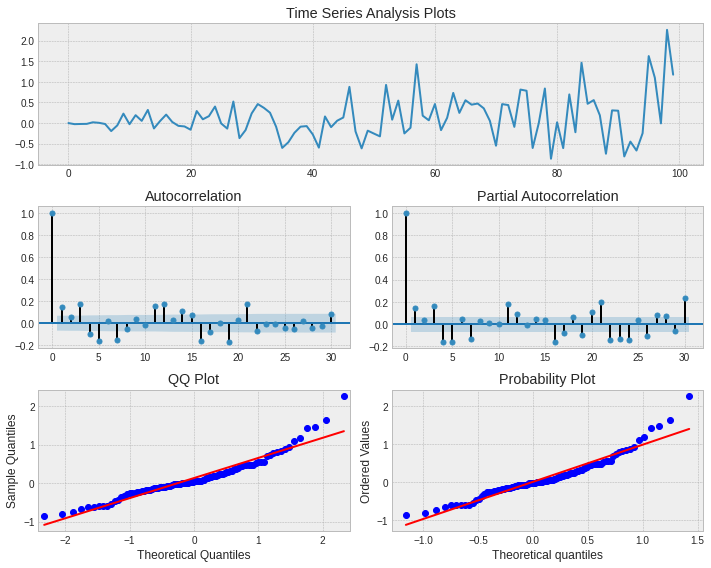

In [5]:
# residuals 
tsplot(y, lags=30)

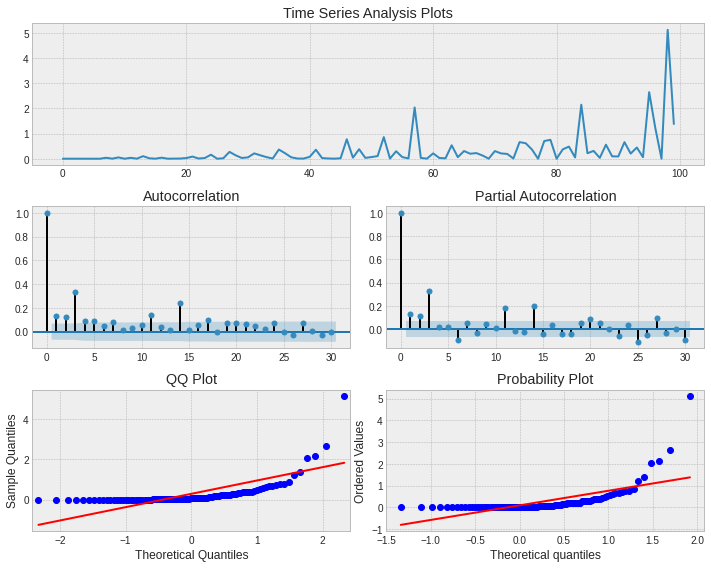

In [6]:
# squared residuals 
tsplot(np.square(y), lags=30)

Running the example creates an autocorrelation plot of the squared observations. We see significant positive correlation in variance out to perhaps 14 lag time steps.

This might make a reasonable value for the parameter in the ARCH model.If a correlogram appears to be white noise, then volatility ca be detected by looking at the correlogram of the squared values since the squared values are equivalent to the variance (provided the series is adjusted to have a mean of zero).

## Build ARCH Model

Developing an ARCH model involves three steps:

- Define the model
- Fit the model
- Make a forecast.

A model can be defined by calling the arch_model() function. We can specify a model for the mean of the series: in this case mean=’Zero’ is an appropriate model. We can then specify the model for the variance: in this case vol=’ARCH’. We can also specify the lag parameter for the ARCH model: in this case p=14.

In [7]:
# split into train/test
n_test = 10
train = y[:-n_test]
test = y[-n_test:]

# define model
model = arch_model(train, mean="Zero", vol="ARCH", p=14)

# fit model
model_fit = model.fit()
print(model_fit.summary())

Iteration:      1,   Func. Count:     17,   Neg. LLF: 40.41398904442549
Iteration:      2,   Func. Count:     38,   Neg. LLF: 40.25314193593848
Iteration:      3,   Func. Count:     56,   Neg. LLF: 38.328042243464175
Iteration:      4,   Func. Count:     74,   Neg. LLF: 37.35961950590966
Iteration:      5,   Func. Count:     92,   Neg. LLF: 36.6347494917402
Iteration:      6,   Func. Count:    110,   Neg. LLF: 35.600395581018816
Iteration:      7,   Func. Count:    128,   Neg. LLF: 35.30074111695036
Iteration:      8,   Func. Count:    146,   Neg. LLF: 33.88101733347006
Iteration:      9,   Func. Count:    164,   Neg. LLF: 33.76074979601768
Iteration:     10,   Func. Count:    182,   Neg. LLF: 33.484809518795224
Iteration:     11,   Func. Count:    200,   Neg. LLF: 33.279607456609966
Iteration:     12,   Func. Count:    218,   Neg. LLF: 33.191771033393444
Iteration:     13,   Func. Count:    236,   Neg. LLF: 33.09473197278423
Iteration:     14,   Func. Count:    254,   Neg. LLF: 32.999

## Make Forecast

In [8]:
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)
yhat.variance.values[-1:]

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


array([[0.55602448, 0.15321907, 0.35770537, 0.394467  , 0.23700446,
        0.81627973, 0.2877997 , 0.36497936, 0.39341413, 0.45938108]])

No handles with labels found to put in legend.


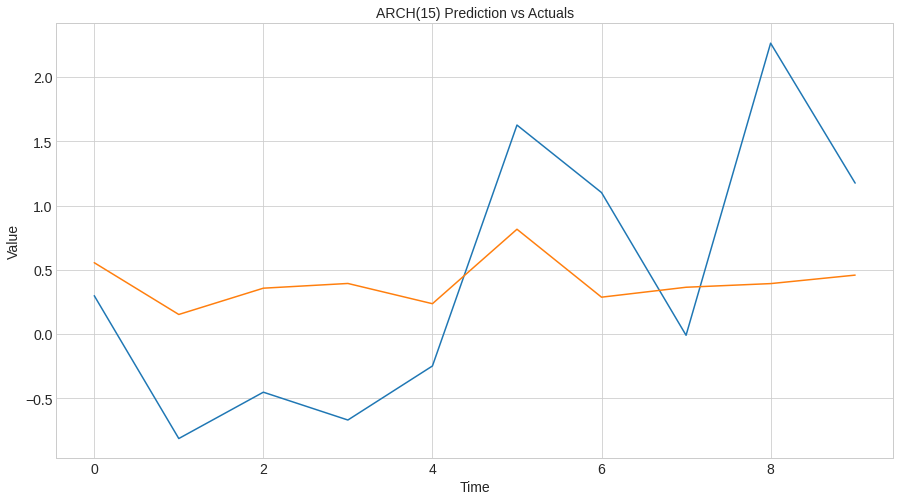

In [9]:
# plot predicted and actual values
plt.figure(figsize=(15,8))
plt.plot(test)
plt.plot(yhat.variance.values[-1:].reshape(-1))
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.title("ARCH(15) Prediction vs Actuals", fontsize=14)
plt.show()